In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
d=pd.read_csv('fitness_class_2212.csv')
d

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [3]:
d.tail(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1490,1491,6,105.12,2,Mon,AM,Yoga,0
1491,1492,8,87.76,2,Mon,PM,HIIT,0
1492,1493,18,74.32,6,Wednesday,PM,HIIT,0
1493,1494,9,80.46,8,Thu,AM,HIIT,0
1494,1495,15,88.50,7,Thu,PM,HIIT,1
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0
1499,1500,20,94.39,8,Thu,AM,Cycling,1


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [5]:
d.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [6]:
d.describe(include='O')

,days_before,day_of_week,time,category
count,1500,1500,1500,1500
unique,31,10,2,6
top,10,Fri,AM,HIIT
freq,293,279,1141,667


In [7]:
d['days_before'].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [8]:
d['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [9]:
d['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

### EDA

In [10]:
d_cat=list(d.select_dtypes('object').columns)
d_cat

['days_before', 'day_of_week', 'time', 'category']

In [11]:
d_float=list(d.select_dtypes('float').columns)
d_float

['weight']

In [12]:
da=d[['weight','months_as_member']]

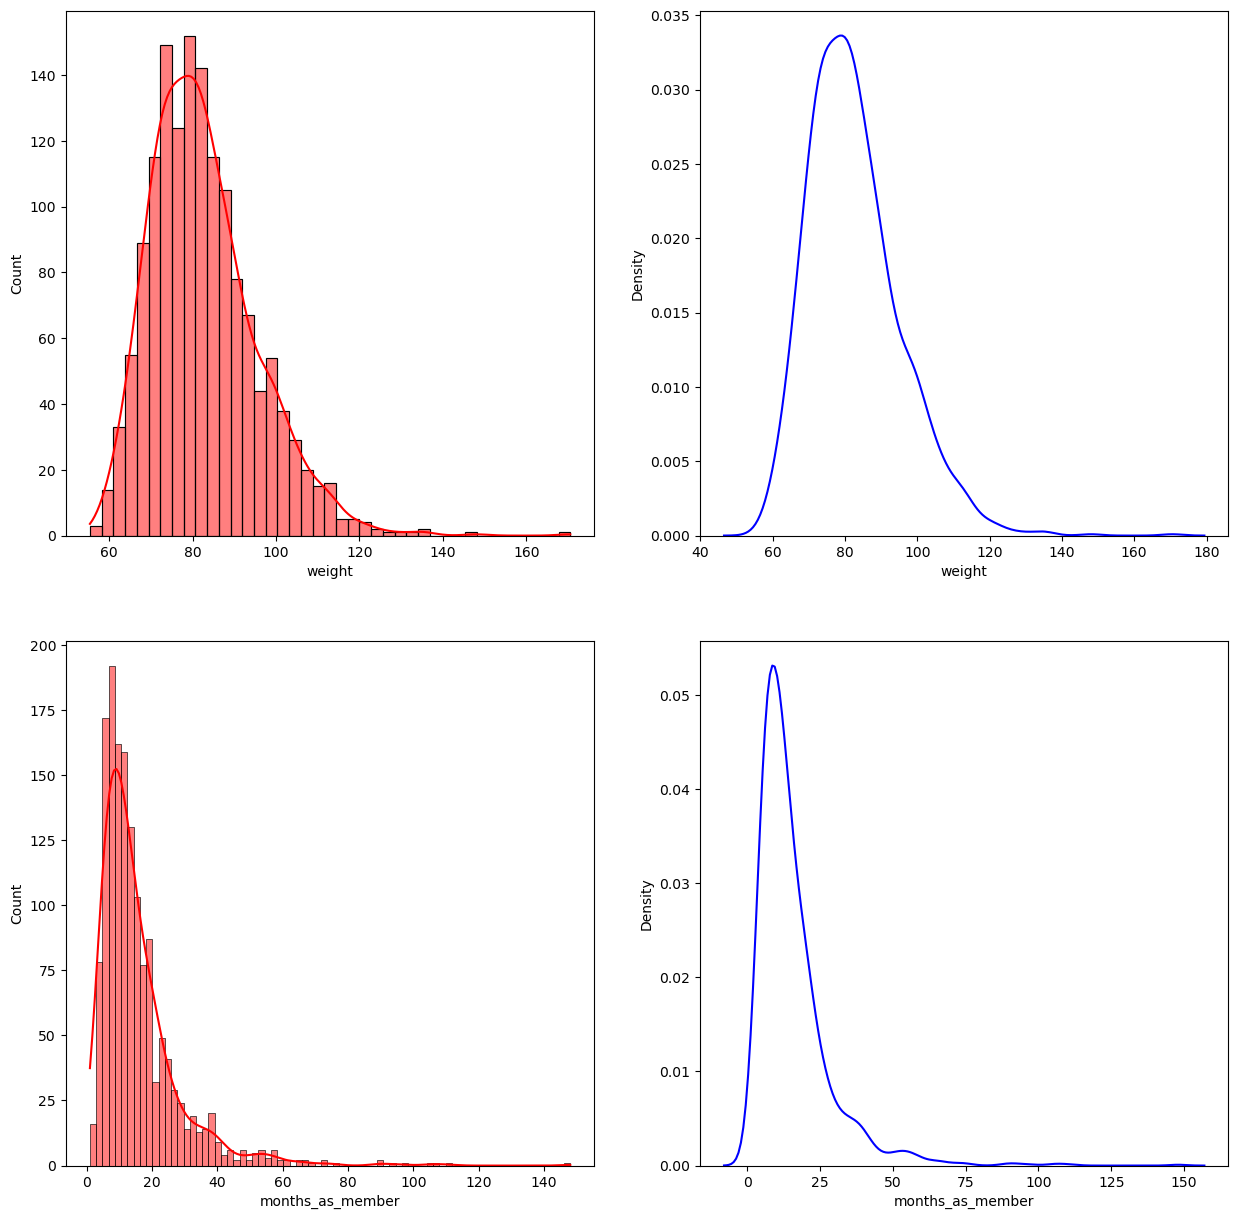

In [13]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
m,n=0,0

for columns in da:
    sns.histplot(d[columns], kde= True,color='red', ax=ax[m][n])
    sns.distplot(d[columns],hist=False,color='blue',ax=ax[m][n+1])
    m+=1

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

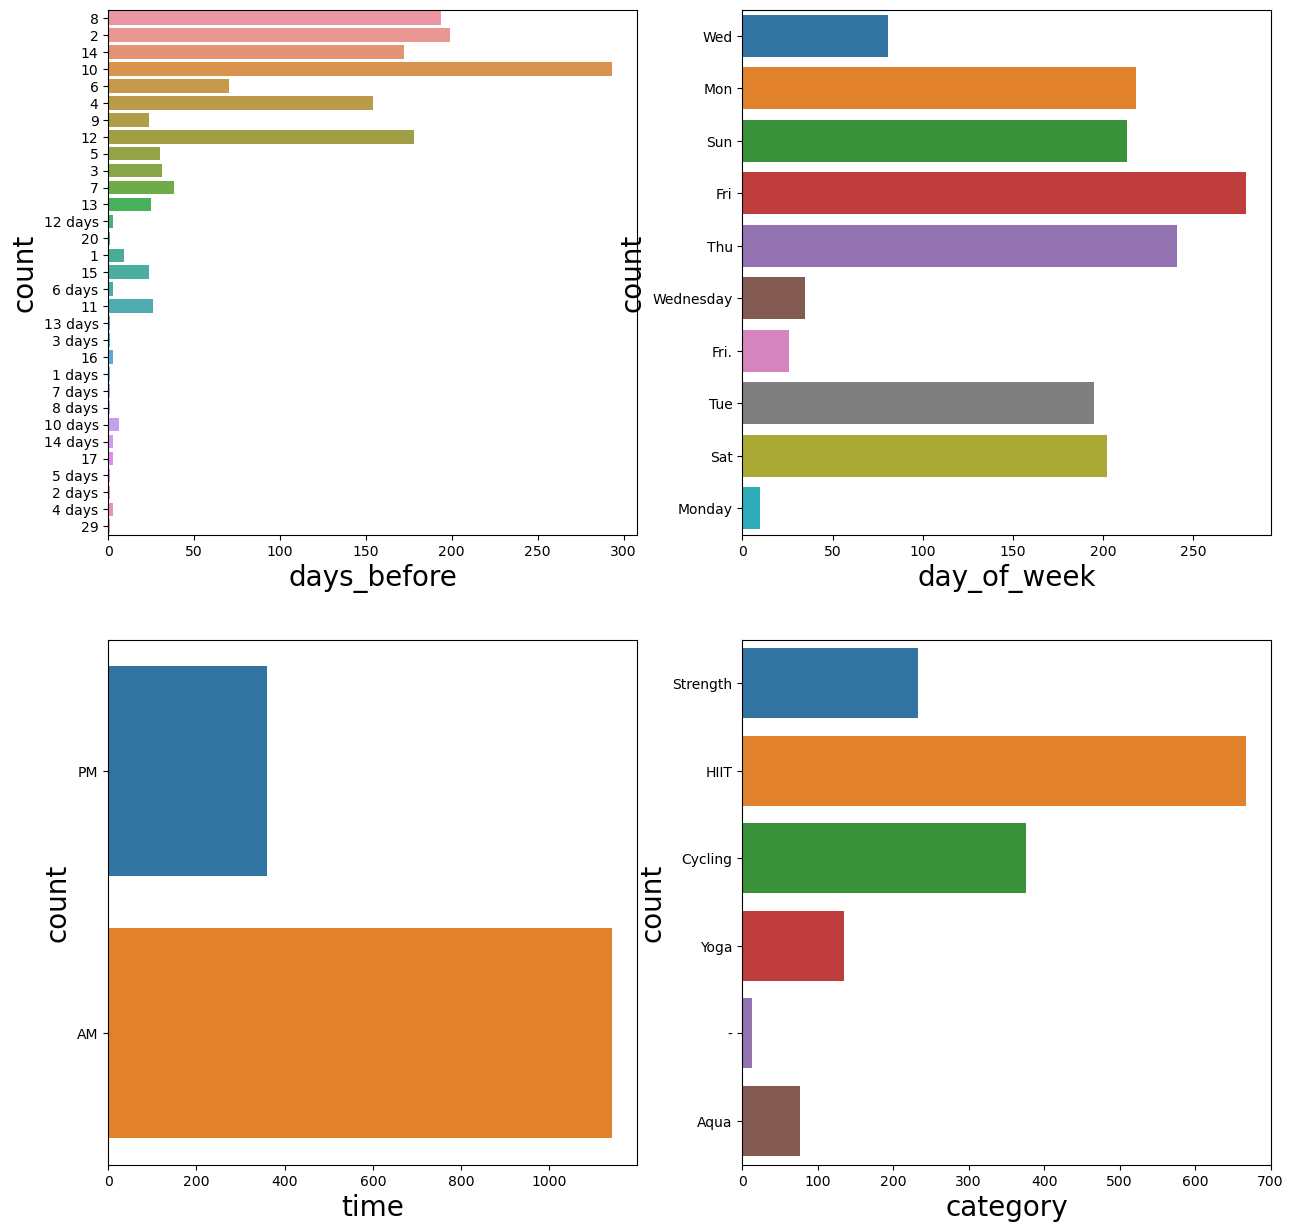

In [14]:
plt.figure(figsize=(15,15))
plot=1
for column in d_cat:
    if plot <=10:
        ax=plt.subplot(2,2,plot)
        sns.countplot(y=d[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("count", fontsize=20)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

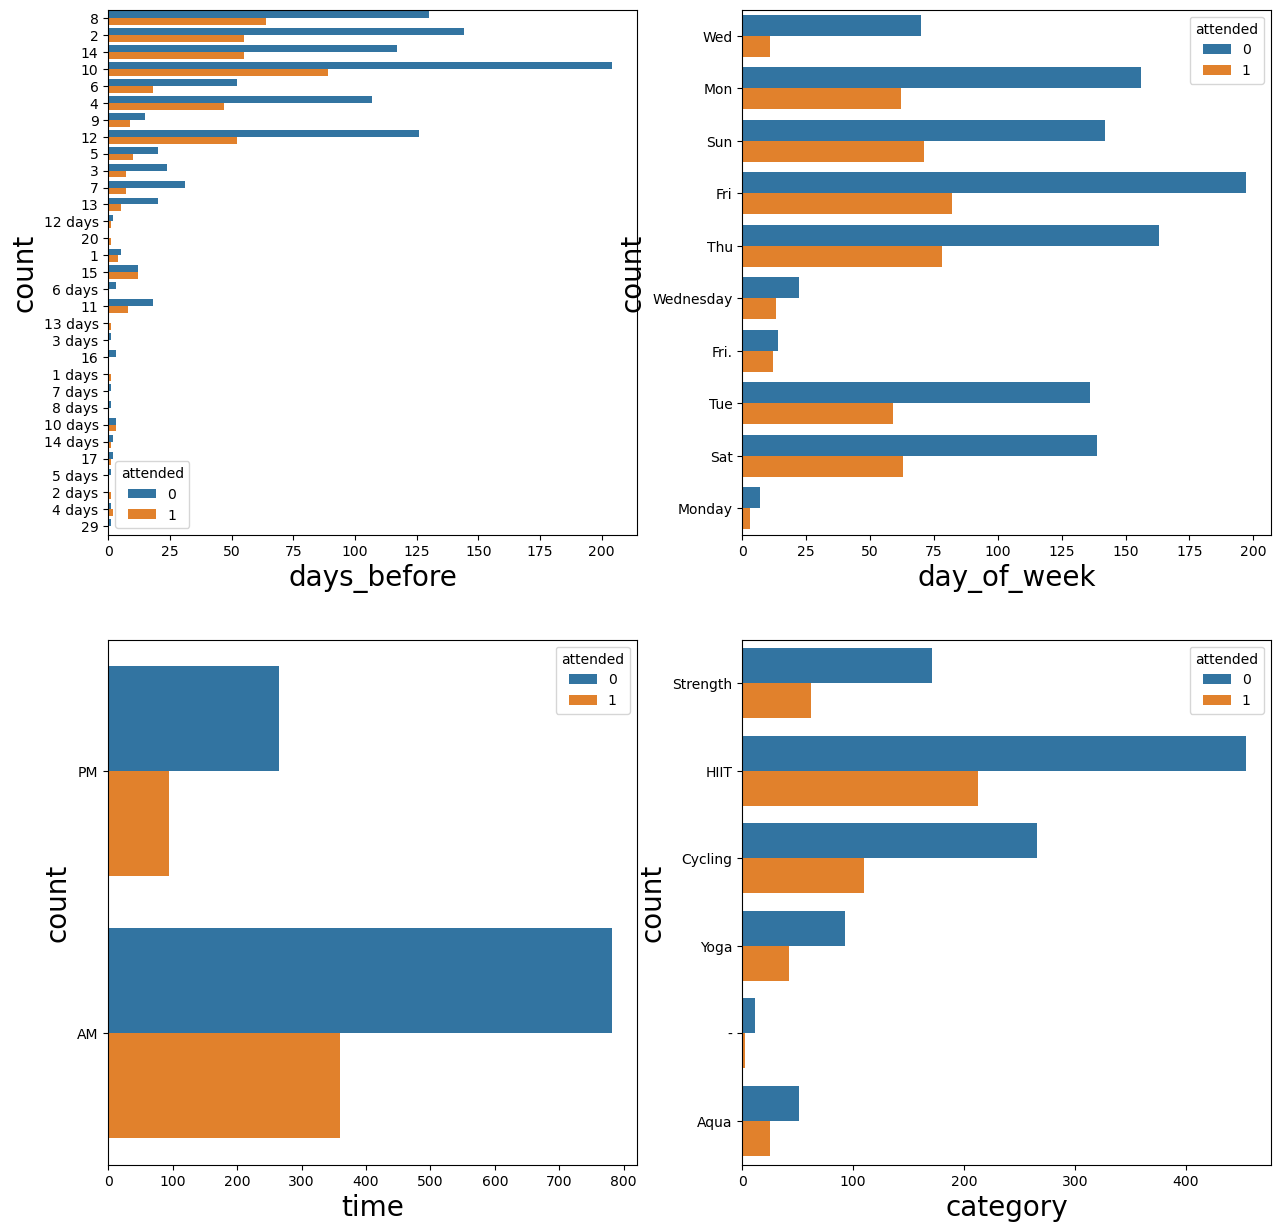

In [15]:
plt.figure(figsize=(15,15))
plot=1
for column in d_cat:
    if plot <=10:
        ax=plt.subplot(2,2,plot)
        sns.countplot(y=d[column], hue=d.attended)
        plt.xlabel(column, fontsize=20)
        plt.ylabel("count", fontsize=20)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

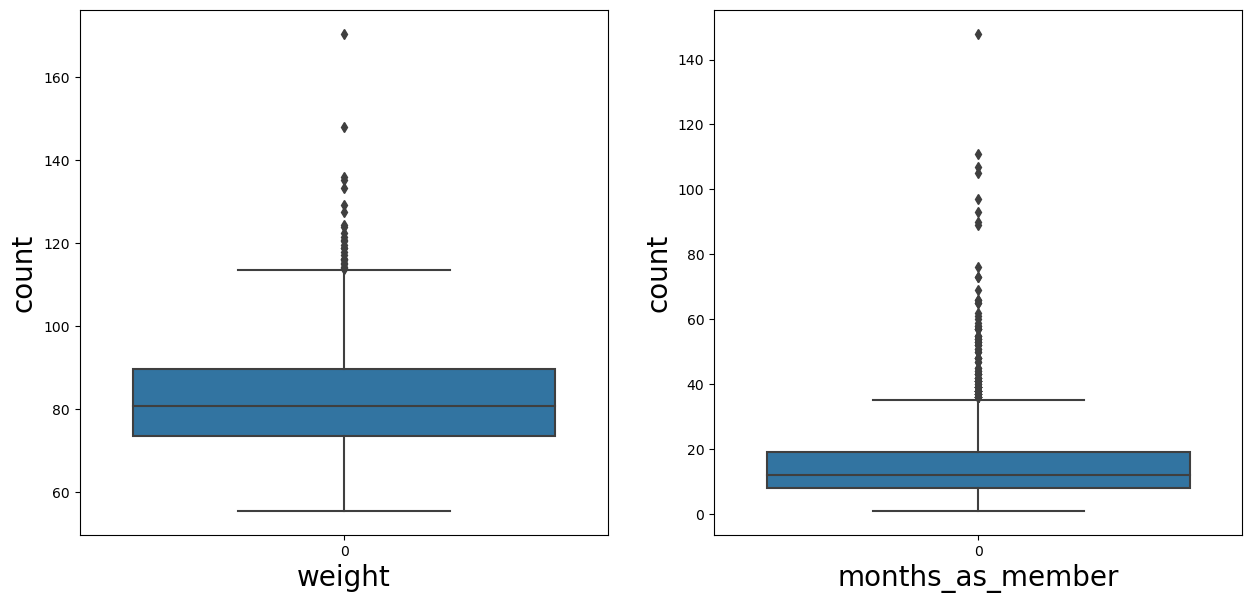

In [16]:
plt.figure(figsize=(15,15))
plot=1
for column in da:
    if plot <=10:
        ax=plt.subplot(2,2,plot)
        sns.boxplot(da[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("count", fontsize=20)
    plot+=1
plt.tight_layout

In [37]:
Q3=d['weight'].quantile(0.75)
Q1=d['weight'].quantile(0.25)
print(Q1)
print(Q3)
iqr=Q3-Q1
print(iqr)

73.5625
89.3825
15.819999999999993


In [38]:
Q3=d['months_as_member'].quantile(0.75)
Q1=d['months_as_member'].quantile(0.25)
print(Q1)
print(Q3)
iqr=Q3-Q1
print(iqr)

8.0
19.0
11.0


In [39]:
upper=Q3+1.5*iqr
lower=Q1-1.5*iqr
print(upper)
print(lower)

35.5
-8.5


In [45]:
da = d[(d['months_as_member'] >= lower) & (d['months_as_member'] <= upper)]

In [46]:
da.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
category            0
attended            0
time_PM             0
dtype: int64

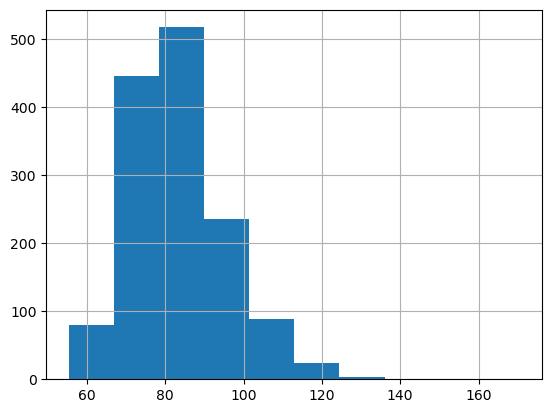

In [47]:
da['weight'].hist()
plt.show()

In [48]:
da['weight'].fillna(value=(da['weight'].mean()),inplace=True)

In [49]:
da.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
category            0
attended            0
time_PM             0
dtype: int64

In [52]:
da['days_before'] = da['days_before'].str.replace(' days', '')

AttributeError: Can only use .str accessor with string values!

In [ ]:
da['']

In [51]:
da['days_before']=da['days_before'].astype('int')

In [53]:
da['days_before'].value_counts()

days_before
10    278
2     191
8     185
12    170
14    163
4     147
6      65
7      35
3      30
5      27
13     26
9      22
15     22
11     20
1       8
16      3
17      3
20      1
29      1
Name: count, dtype: int64

In [54]:
da['category']=da['category'].replace('-','unknow')

In [55]:
da['category'].unique()

array([4, 3, 2, 5, 0, 1])

In [28]:
# Categorical Columns to Numerical Columns

In [56]:
da['day_of_week'].unique()

array([8, 2, 5, 0, 6, 9, 1, 7, 4, 3])

In [57]:
da

,booking_id,months_as_member,weight,days_before,day_of_week,category,attended,time_PM
0,1,17,79.56,8,8,4,0,1
1,2,10,79.01,2,2,3,0,0
2,3,16,74.53,14,5,4,0,0
3,4,5,86.12,10,0,2,0,0
4,5,15,69.29,8,6,3,0,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,0,3,0,0
1496,1497,29,89.55,2,2,4,0,0
1497,1498,9,87.38,4,7,3,0,0
1498,1499,34,68.64,14,5,1,0,0


In [32]:
da=pd.get_dummies(d['time'],prefix='time',drop_first=True, dtype=int)
d=pd.concat([d,da],axis=1).drop(['time'],axis=1)

In [88]:
d

,booking_id,months_as_member,weight,days_before,day_of_week,category,attended,time_PM_True
0,1,17,79,8,3.0,Strength,0,1
1,2,10,79,2,1.0,HIIT,0,0
2,3,16,74,14,7.0,Strength,0,0
3,4,5,86,10,5.0,Cycling,0,0
4,5,15,69,8,4.0,HIIT,0,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79,10,5.0,HIIT,0,0
1496,1497,29,89,2,1.0,Strength,0,0
1497,1498,9,87,4,2.0,HIIT,0,0
1498,1499,34,68,14,7.0,Aqua,0,0


In [58]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1397 non-null   int64  
 1   months_as_member  1397 non-null   int64  
 2   weight            1397 non-null   float64
 3   days_before       1397 non-null   int32  
 4   day_of_week       1397 non-null   int32  
 5   category          1397 non-null   int32  
 6   attended          1397 non-null   int64  
 7   time_PM           1397 non-null   int32  
dtypes: float64(1), int32(4), int64(3)
memory usage: 76.4 KB


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d['category']=le.fit_transform(d['category'])
d['day_of_week']=le.fit_transform(d['day_of_week'])

In [59]:
da

,booking_id,months_as_member,weight,days_before,day_of_week,category,attended,time_PM
0,1,17,79.56,8,8,4,0,1
1,2,10,79.01,2,2,3,0,0
2,3,16,74.53,14,5,4,0,0
3,4,5,86.12,10,0,2,0,0
4,5,15,69.29,8,6,3,0,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,0,3,0,0
1496,1497,29,89.55,2,2,4,0,0
1497,1498,9,87.38,4,7,3,0,0
1498,1499,34,68.64,14,5,1,0,0


<Axes: >

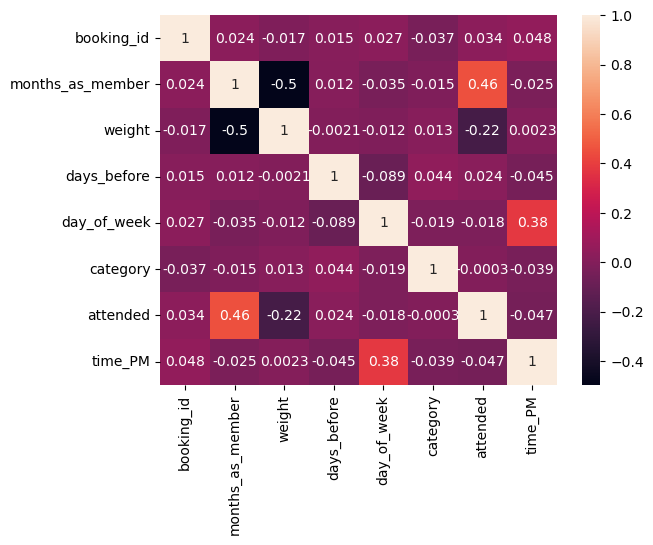

In [60]:
sns.heatmap(da.corr(),annot=True)

In [66]:
da.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'category', 'attended', 'time_PM'],
      dtype='object')

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
da[['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'category', 'time_PM']]=sc.fit_transform(da[['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'category', 'time_PM']])

In [71]:
x=da.drop('attended',axis=1)
y=da['attended']

In [72]:
x

,booking_id,months_as_member,weight,days_before,day_of_week,category,time_PM
0,-1.730012,0.551199,-0.314074,-0.083613,1.470577,1.019838,1.777003
1,-1.727704,-0.414956,-0.357901,-1.549812,-0.784523,0.044675,-0.562745
2,-1.725395,0.413177,-0.714899,1.382587,0.343027,1.019838,-0.562745
3,-1.723086,-1.105066,0.208674,0.405120,-1.536223,-0.930488,-0.562745
4,-1.720778,0.275155,-1.132460,-0.083613,0.718877,0.044675,-0.562745
...,...,...,...,...,...,...,...
1495,1.721414,1.103288,-0.318058,0.405120,-1.536223,0.044675,-0.562745
1496,1.723723,2.207465,0.482000,-1.549812,-0.784523,1.019838,-0.562745
1497,1.726031,-0.552978,0.309079,-1.061079,1.094727,0.044675,-0.562745
1498,1.728340,2.897575,-1.184256,1.382587,0.343027,-1.905652,-0.562745


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=45)

In [149]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_train_predict=lr.predict(x_train)

In [150]:
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_pred))

Train accuracy : 0.7824529991047449
Test accuracy : 0.7571428571428571


In [151]:
pd.crosstab(y_test,y_pred)

col_0,0,1
attended,,
0,188,13
1,55,24


In [152]:
y_pred_prob=lr.predict_proba(x_test)
y_pred_prob

array([[0.90547567, 0.09452433],
       [0.93809751, 0.06190249],
       [0.88588745, 0.11411255],
       [0.90868028, 0.09131972],
       [0.3312585 , 0.6687415 ],
       [0.89112802, 0.10887198],
       [0.66296404, 0.33703596],
       [0.7346673 , 0.2653327 ],
       [0.86644176, 0.13355824],
       [0.63786881, 0.36213119],
       [0.93273447, 0.06726553],
       [0.53619963, 0.46380037],
       [0.89117479, 0.10882521],
       [0.90850291, 0.09149709],
       [0.85131978, 0.14868022],
       [0.9489789 , 0.0510211 ],
       [0.85847479, 0.14152521],
       [0.89707965, 0.10292035],
       [0.88308559, 0.11691441],
       [0.79987077, 0.20012923],
       [0.82848525, 0.17151475],
       [0.41742898, 0.58257102],
       [0.92892731, 0.07107269],
       [0.81927755, 0.18072245],
       [0.46375412, 0.53624588],
       [0.78187129, 0.21812871],
       [0.84304367, 0.15695633],
       [0.59581754, 0.40418246],
       [0.83535614, 0.16464386],
       [0.54412007, 0.45587993],
       [0.

In [153]:
accuracy_score(y_pred,y_test)

0.7571428571428571

In [178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       201
           1       0.51      0.62      0.56        79

    accuracy                           0.72       280
   macro avg       0.67      0.69      0.68       280
weighted avg       0.74      0.72      0.73       280



### RandomForestClassifier

In [140]:

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
y_predict=rf_clf.predict(x_test)

In [143]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       201
           1       0.53      0.34      0.42        79

    accuracy                           0.73       280
   macro avg       0.65      0.61      0.62       280
weighted avg       0.70      0.73      0.71       280



### using smote 

In [162]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [163]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [169]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 829, 1: 288})
SMOTE Classes Counter({0: 829, 1: 829})


In [179]:
lr=LogisticRegression()
lr.fit(x_smote,y_smote)
y_pred=lr.predict(x_test)
y_train_predict=lr.predict(x_train)

In [180]:
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_pred))

Train accuracy : 0.7412712623097583
Test accuracy : 0.7214285714285714


In [181]:
pd.crosstab(y_test,y_pred)

col_0,0,1
attended,,
0,153,48
1,30,49


In [182]:
y_predict=rf_clf.predict(x_test)

In [185]:
accuracy_score(y_pred,y_test)

0.7214285714285714

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       201
           1       0.51      0.62      0.56        79

    accuracy                           0.72       280
   macro avg       0.67      0.69      0.68       280
weighted avg       0.74      0.72      0.73       280



### ANN

In [254]:
from sklearn.neural_network import MLPClassifier # multi layer perceptron
model = MLPClassifier( hidden_layer_sizes=(300,4),
                       learning_rate_init=0.01,
                       max_iter=150,
                       random_state=2) ## model object creation max_iter=Stopping parameter
model.fit(x_train,y_train) ## training the data
y_predict_proba = model.predict_proba(x_test) ## predicting the pro
## bability of class
y_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)

In [255]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.9239033124440466
Test accuracy : 0.7214285714285714


In [256]:
pd.crosstab(y_test,y_predict)

col_0,0,1
attended,,
0,170,31
1,47,32


In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       201
           1       0.51      0.41      0.45        79

    accuracy                           0.72       280
   macro avg       0.65      0.63      0.63       280
weighted avg       0.71      0.72      0.71       280

